In [50]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data

In [51]:
diabetes_processed = pd.read_csv('processed_diabetes_binary.csv')

In [52]:
sample = diabetes_processed.sample(200, random_state=92)
X = sample['Diabetes_binary']
y = sample.drop(columns=['Diabetes_binary'])
X_train, X_test, y_train, y_test = train_test_split(y, X, test_size=0.2, random_state=92)


# K-best feature

In [53]:
f1_score_list = []
lsvm = svm.LinearSVC(C=1000000)
# arbitrary k, we decide (now 11 features)
for k in range(1, 12):
    selector = SelectKBest(mutual_info_classif, k=k)
    selector.fit(X_train, y_train)

    selector_X_train = selector.transform(X_train)
    selector_X_test = selector.transform(X_test)

    # Fit on model
    lsvm.fit(selector_X_train, y_train)
    kbest_predictions = lsvm.predict(selector_X_test)

    f1_score_kbest = round(f1_score(y_test, kbest_predictions, average='weighted'), 3)
    f1_score_list.append(f1_score_kbest)


c:\Users\Sandy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Sandy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Sandy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Sandy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Sandy\AppData\Local\Programs\Python\Python310\lib\site-pa

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

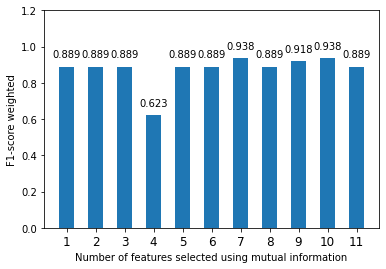

In [54]:
fig, ax = plt.subplots()

x = np.arange(1,12)
y = f1_score_list

ax.bar(x,y, width=0.5)
ax.set_xlabel("Number of features selected using mutual information")
ax.set_ylabel("F1-score weighted")
ax.set_ylim(0, 1.2)
ax.set_xticks(np.arange(1,12))
ax.set_xticklabels(np.arange(1,12), fontsize=12)

for index, value in enumerate(y):
    plt.text(x=index+1, y=value+0.05, s=str(value), ha='center')

plt.tight_layout

# So using 11 features better, btw this graph keeps changing each run because of the sample I'm assuming

In [55]:
# Find the features
selector = SelectKBest(mutual_info_classif, k=7)
selector.fit(X_train,y_train)
selected_feature_mask = selector.get_support()
selected_features = X_train.columns[selected_feature_mask]
selected_features

Index(['HighBP', 'HighChol', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income'], dtype='object')

# Problem
- We need to run this over whole db again...Right now I used a sample
- Using a sample gives me a different graph and different best features each time